In [1]:
!pip install cjklib3

  Using cached cjklib3-0.0.3-py3-none-any.whl (28.1 MB)


In [2]:
#import sys
#!{sys.executable} -m pip install cjklib
import numpy as np
import pandas as pd
import cjklib
from cjklib import characterlookup

In [125]:
df = pd.read_csv('Chinese Lexicon Project Sze et al.csv')

In [4]:
# df

In [133]:
# Import the xinhua Chinese dictionary
xinhua = pd.read_csv("xinhua.csv")

In [134]:
char = list(df.Character)
rt = list(df.RT)
xinhua_char = list(xinhua.character)
radical = list(xinhua.radical)

In [135]:
######################## Study 1 ########################
# Correlation between stroke counts and rt
# check stroke counts
charlookup = characterlookup.CharacterLookup('T')
stroke_count = []
for i in char:
    stroke_count.append(charlookup.getStrokeCount(i))

# Uncomment to check the stroke count
#stroke_count

In [136]:
######################## Study 2 ########################
# Correlation between radical_removed stroke counts and rt
# get the radical for each character
new_char = []
radical_list = []
for i in range(len(char)):
    for j in range (len(xinhua_char)):
        if char[i] == xinhua_char[j]:
            radical_list.append(radical[j])
            new_char.append(char[i])
            
# print(radical_list)
# print(new_char)

In [137]:
# Check missing characters
for i in char:
    if i not in new_char:
        print(i)

礡
丟
屡
拋


In [138]:
# get the stroke count for each charcter in the new list
new_stroke_count = []
for i in new_char:
    new_stroke_count.append(charlookup.getStrokeCount(i))

# get the radical count for each charcter
radical_count = []
for j in radical_list:
    radical_count.append(charlookup.getStrokeCount(j))

#print(radical_count)

In [139]:
# check radical removed stroke counts
radical_removed = []
for i in range(len(new_stroke_count)):
    x = new_stroke_count[i] - radical_count[i]
    radical_removed.append(x)

#print(radical_removed)

In [140]:
# get the reaction time list for radical removed characters
new_rt = []
for i in range(len(char)):
    for j in range(len(new_char)):
        if char[i] == new_char[j]:
            new_rt.append(rt[i])
            
# new_rt

In [141]:
# Check nulls for radical removed characters
for i in range(len(radical_removed)):
    if radical_removed[i] == 0:
        print(new_char[i])

才
采
川
电
刁
鼎
高
胳
网
无
行
玄
由


In [142]:
######################## Study 3 ########################
# Compare rt for radical_removed characters within each radical.

# Get all the radicals used in the study
radicals = []
for k in radical_list: 
    if k not in radicals:
        radicals.append(k)

# Get the dictionary containing all characters for each radical.
radical_dict = {}
for k in radicals:
    l = []
    for i in range(len(new_char)):
        if radical_list[i] == k:
            l.append(new_char[i])
    radical_dict[k] = l


In [143]:
print(radical_dict)


{'口': ['啊', '哎', '哀', '唉', '叭', '吧', '哺', '嘈', '唱', '呈', '吃', '啜', '喘', '吹', '唇', '呆', '叨', '吊', '哆', '啡', '吠', '吩', '否', '咐', '告', '哥', '各', '咕', '古', '呱', '哈', '含', '喊', '号', '喝', '合', '和', '哄', '吼', '后', '呼', '唤', '吉', '嘉', '叫', '噤', '咎', '句', '君', '可', '吭', '叩', '哭', '啦', '喇', '哩', '吏', '吝', '另', '吕', '吗', '名', '命', '呐', '喃', '囊', '喏', '哦', '啪', '咆', '品', '启', '器', '嚷', '嗓', '啬', '善', '呻', '史', '嗜', '噬', '吮', '司', '嘶', '嗣', '唆', '嗦', '台', '叹', '唐', '嚏', '听', '同', '吐', '吞', '哇', '味', '吻', '呜', '吴', '吾', '吸', '嘻', '喜', '咸', '响', '向', '哓', '嚣', '哮', '啸', '嗅', '喧', '呀', '咬', '叶', '咦', '呓', '吟', '唷', '哟', '咏', '右', '吁', '喻', '员', '咱', '噪', '啧', '喳', '召', '哲', '吱', '只', '周', '嘱', '啄', '嘴'], '土': ['埃', '堡', '埠', '场', '城', '堤', '地', '堵', '堕', '坟', '坏', '圾', '基', '坚', '境', '均', '堪', '坎', '坑', '坤', '垃', '垄', '埋', '墨', '墓', '坪', '墙', '壤', '塞', '圣', '墅', '塌', '坛', '坦', '塘', '填', '墟', '垠', '域', '在', '增', '址', '坠', '坐'], '扌': ['挨', '按', '扒', '拔', '搬', '扮', '抱', '报', '摈', '拨', '播', '搏', '擦', '才',

In [144]:
len(radicals)

195

In [145]:
######################## Data Analysis ########################

import matplotlib.pyplot as plt
from scipy import stats

In [146]:
# Study 1 linear regression results
slope1, intercept1 =  np.polyﬁt(stroke_count, rt, 1)
result_1 = stats.linregress(stroke_count, rt)
print(result_1)

LinregressResult(slope=7.369933790047458, intercept=529.7896487616249, rvalue=0.3098711047884425, pvalue=8.96616586439971e-57, stderr=0.4524448772607573)


Text(0, 0.5, 'Reaction Time')

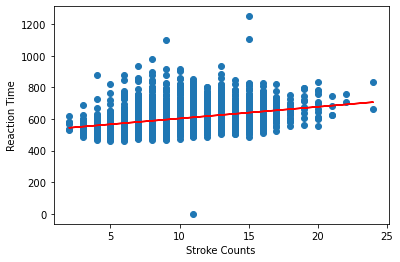

In [147]:
# Study 1 result graph
plt.scatter(stroke_count, rt)
plt.plot(stroke_count, np.multiply(slope1, stroke_count) + intercept1, 'r-')
plt.xlabel("Stroke Counts")
plt.ylabel("Reaction Time")

In [148]:
# Study 2 linear regression results
slope2, intercept2 = np.polyﬁt(radical_removed, new_rt, 1)
result_2 = stats.linregress(radical_removed, new_rt)
print(result_2)

LinregressResult(slope=7.619099272309819, intercept=555.0624164800901, rvalue=0.2790367734354089, pvalue=7.186914042240392e-46, stderr=0.5250395735895467)


Text(0, 0.5, 'Reaction Time')

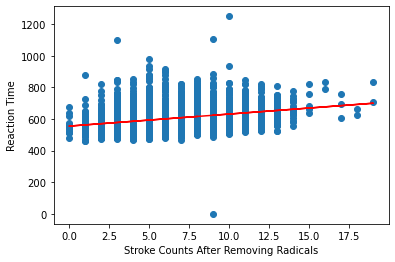

In [149]:
# Study 2 result graph
plt.scatter(radical_removed, new_rt)
plt.plot(radical_removed, np.multiply(slope2, radical_removed) + intercept2, 'r-')
plt.xlabel("Stroke Counts After Removing Radicals")
plt.ylabel("Reaction Time")

In [155]:
# Study 3 analysis
r_value_list = []
p_value_list = []
for j in radicals:
    r = []
    for i in range(len(new_rt)):
        if radical_list[i] == j:
            r.append(new_rt[i])
    
    s = []
    for i in range(len(new_char)):
        if radical_list[i] == j:
            s.append(radical_removed[i])
    
    result_3 = stats.linregress(s, r)
    slope, intercept, r_value, p_value, std_err = result_3
    r_value_list.append(r_value)
    if r_value != 0:
        p_value_list.append(p_value)
    print("Radical:", j, "\n" , result_3)
    

Radical: 口 
 LinregressResult(slope=6.866538857920729, intercept=570.9566750089184, rvalue=0.29127260754649353, pvalue=0.0005282204588124549, stderr=1.9338258558576813)
Radical: 土 
 LinregressResult(slope=2.4384992833995467, intercept=593.6891524446078, rvalue=0.1199680321952138, pvalue=0.4379400783954325, stderr=3.113755368655418)
Radical: 扌 
 LinregressResult(slope=7.509133603189079, intercept=568.4829332075204, rvalue=0.30901253240780585, pvalue=0.0003291363990149997, stderr=2.0348194052223794)
Radical: 疒 
 LinregressResult(slope=-2.5107147639771834, intercept=701.2227055027982, rvalue=-0.08074082881587238, pvalue=0.688903002778481, stderr=6.1988900593216725)
Radical: 矢 
 LinregressResult(slope=11.605844777906993, intercept=511.30046188372086, rvalue=0.5442692819843777, pvalue=0.34293767202762837, stderr=10.328041498867051)
Radical: 艹 
 LinregressResult(slope=7.538142083606431, intercept=564.6461205347191, rvalue=0.26726116153473306, pvalue=0.022264843975859663, stderr=3.22557364141

In [151]:
ave_r = sum(r_value_list)/len(r_value_list)
print("Average Pearson's r correlation coefficient is: ", ave_r)

ave_p = sum(p_value_list)/len(p_value_list)
print("Average p value is: ", ave_p)


Average Pearson's r correlation coefficient is:  0.1542809522266968
Average p value is:  0.3194279650468257


Text(0.5, 0, 'Radicals')

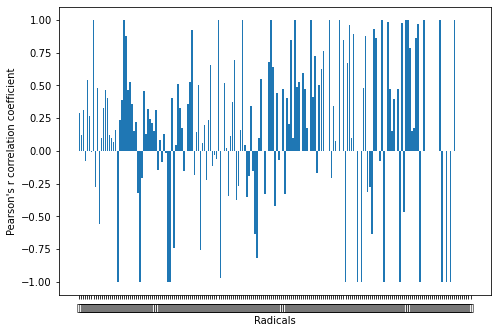

In [156]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(radicals, r_value_list)
plt.ylabel("Pearson's r correlation coefficient")
plt.xlabel("Radicals")

In [153]:
# correlation analysis
from scipy.stats import pearsonr
stroke_cor = pearsonr(stroke_count, rt)
radical_cor = pearsonr(radical_removed, new_rt)

# study 1 correlation
print("Correlation for study 1 is: ", stroke_cor)

# study 2 correlation
print("Correlation for study 2 is: ", radical_cor)

Correlation for study 1 is:  (0.3098711047884415, 8.966165864431881e-57)
Correlation for study 2 is:  (0.2790367734354088, 7.186914042211598e-46)


In [154]:
# Check characters with more than 20 strokes
for i in char:
    if charlookup.getStrokeCount(i) >20:
        print(i)

霸
矗
蠢
罐
躏
囊
巍
醺
